# 🧾 환자 설명: Permutation Importance 기반 자연어 해석

이 노트북은 환자의 예측 결과를 Permutation Importance 기반으로 해석하고,
상위 중요한 피처들을 자연어 문장으로 설명합니다.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import os

# 데이터 불러오기 및 전처리
os.chdir ("../참고자료")
df = pd.read_csv("heart_cleveland_upload.csv")
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

X = df_encoded.drop('condition', axis=1)
y = df_encoded['condition']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [14]:
# 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
from sklearn.inspection import permutation_importance

# Permutation Importance 계산
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
importances = result.importances_mean
feature_names = X.columns.to_numpy()
indices = np.argsort(importances)[::-1]

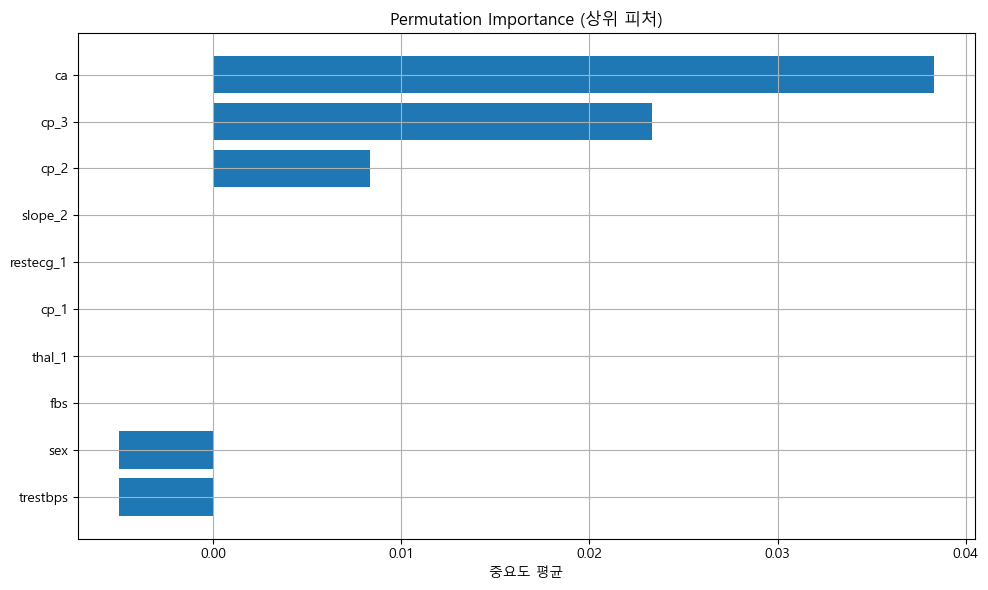

In [16]:
# 시각화
plt.figure(figsize=(10, 6))
plt.title("Permutation Importance (상위 피처)")
plt.barh([X.columns[i] for i in indices[:10]][::-1],
         importances[indices[:10]][::-1])
plt.xlabel("중요도 평균")
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
def explain_patient_permutation(index, X_test, importances, feature_names, top_n=3):
    """
    Permutation Importance 기반으로 환자의 주요 피처를 자연어로 설명하는 함수
    
    Args:
        index: 설명할 환자의 인덱스
        X: 전체 feature DataFrame (원래 피처 이름 포함)
        X_test: 스케일된 테스트셋
        model: 학습된 모델
        importances: permutation_importance().importances_mean 결과
        feature_names: 피처 이름 리스트
        top_n: 설명할 상위 피처 개수
    """
    # 가장 중요한 피처 상위 N개 인덱스
    sorted_idx = np.argsort(importances)[::-1][:top_n]

    print(f"🧾 환자 {index}에 대한 예측 설명:\n")
    for i in sorted_idx:
        feature_name = feature_names[i]
        value = X_test[index][i]
        direction = "높은" if value > 0 else "낮은"
        print(f"- {feature_name} 값이 {direction} 값({value:.2f})으로 나타나 심장 질환 위험에 영향을 주었습니다.")


In [18]:
# 환자 0번에 대한 자연어 설명 출력
explain_patient_permutation(0, X_test, importances, feature_names)


🧾 환자 0에 대한 예측 설명:

- ca 값이 높은 값(1.41)으로 나타나 심장 질환 위험에 영향을 주었습니다.
- cp_3 값이 높은 값(1.04)으로 나타나 심장 질환 위험에 영향을 주었습니다.
- cp_2 값이 낮은 값(-0.62)으로 나타나 심장 질환 위험에 영향을 주었습니다.
